## Goal
Sound propagation in seawater, specifically its masking potential,  is affected mainly by three distance-related effects (Erbe et al., 2015):
* **Absorbtion**: The spectrum of sound is dampened as a function of distance, as higher frequencies are absorbed more rapidly than lower frequencies.
* **Interference**: Sound reflections at the water surface and at the sea bottom result in interference phenomena which can change the frequency spectrum of the perceived noise. This phenomenon (Lloyd Mirror effect) is particularly present at short distances (e.g. passing ships).
* **Dispersion**: Frequency dispersion affects the spectral and temporal structure of perceived sounds, resulting in stretched sounds at several km distance.

As it is unlikely that we can obtain a sufficient number of noise recordings at different distances, the effect of distance could be simulated. Starting from a recording at close distance (< 1km), the sound at fixed distances, e.g. 20 and 80 km, could be approximated. This Jupyter notebook was set up to investigate suitable sound processing algorithms for this simulation.

Please note that sound processing programs are not suitable for running in the backend of an online application, so these sound manipulations would have to be pre-processed and cached before being served by the online application.

A worked-out example is provided at the bottom of the page.

### Absorbtion

Absorbtion is a function of frequency (table 1). 

<i>**Tab 1.** Energy loss for different frequencies in (deep) water. Adapted from Erbe et al., 2016</i>

|Frequency (kHz) | Absorbtion (dB/km) |
|----------------|--------------------|
|1               | 0.1                |
|10              | 1                  |
|100             |35                  |

Based on the values reported by Erbe et al. (2016), for any given distance, a lowpass filter can used to approximate the absorbtion of the sound in water. For example, the following filter constructed using sox and octave (for drawing the curve) has an amplitude response that approximates the frequency absorbtion at 15 km distance:
```
sox --plot octave -n test.mp3  lowpass -1 1.5k> lowpass.plt
octave lowpass.plt
```

<img src="images/filter_15km.png" width="600px" />
<em><b>Fig. 1</b>: Filter response</em>

### Interference
Interference occurs near the sound source as sound is reflected by the water surface. Interference can be simulated by applying phase shifting. For example, the following sound effect applies phase shifting to pink noise (using Audacity) to create a U-shaped interference pattern (Lloyd Mirror effect) somewhat similar to the interference created by multi-path sound reflections on the water surface. 

```
Audacity phaser effect stages: 24, dry/wet: 128, LFO (Hz) 0.0028, LFO phase (deg): 0, 
depth: 100, feedback: 0%, output gain: -6 dB
```

In [1]:
# save spectrogram to file
library(tools)
library(tuneR)
library(seewave)

png(file="images/interference_spectrogram.png", width=420, height=420)
s1 <- readWave("audio/interference01_phaser.wav")
spectro(s1, 
        palette=reverse.heat.colors,,collevel=seq(-128,0,1),
        flim=c(0,10),flog=TRUE,scale=FALSE,fastdisp=TRUE)
dev.off()

png 
  2

<table>
    <tr>
        <td width="50%"><img src="images/interference_spectrogram.png" /></td>
        <td width="50%"><img src="images/Erbe_spectrogram.png" /></td>
    </tr>
</table>
    
<em>**Fig. 2**: (Left) simulated interference on pink noise and (Right) spectrogram of passing ship from Erbe et al. (2016) for comparison (frequencies not to scale).</em>


### Dispersion
Sound frequency dispersion occurs as wave speed depends on frequency. Dispersion is a function of distance, water depth and seafloor properties (Erbe et al., 2016). Wide band sounds at the source transform into frequency-modulated narrow band sounds at a distance of tenths to hundreds of kilometers.

Frequency dispersion could be simulated by applying a chorus effect, i.e. a delay with variable length, resulting in multiple copies of the original tone at slightly different pitch.

This is demonstrated in the following sox script:
```
# Generate a 2 Hz hammering sound 
sox -n dispersion01.wav synth 30 square 0.5
# Apply chorus
sox dispersion01.wav dispersion01_chorus.wav gain -12 reverb chorus 0.7 0.9 100 0.4 0.25 2 -t
```

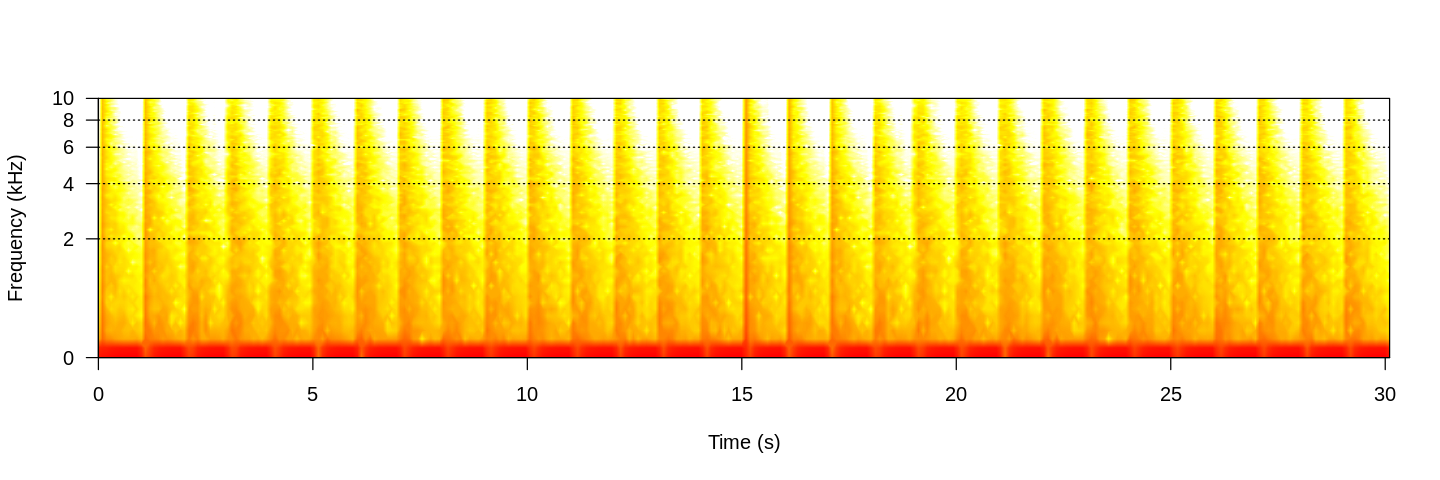

In [2]:
s1 <- readWave("audio/dispersion01_chorus.wav")
options(repr.plot.width=12, repr.plot.height=4)
spectro(s1, 
        palette=reverse.heat.colors,,collevel=seq(-128,0,1),
        flim=c(0,10),flog=TRUE,scale=FALSE,fastdisp=TRUE)

## Example
Two recordings of a pile-driving operation at 2-4 km and 14-16 km (Michael Dähne, n.d.) were used to check the distance simulation. The simulated sound was obtained by starting from the sound recorded at cose range and applying the filters described above (order: interference, dispersion, absorbtion).

Sounds (you might need to download to play):
* [Pile-driving recorded at 2-4 km distance](audio/PileDriving_2-4km_keinBlasenschleierMedien1.wav)
* [Pile-driving recorded at 14-16 km distance](audio/PileDriving_14-16km_keinBlasenschleierMedien1.wav)
* [Simulated sound at 15km distance](audio/PileDriving_15km_simulated.wav)


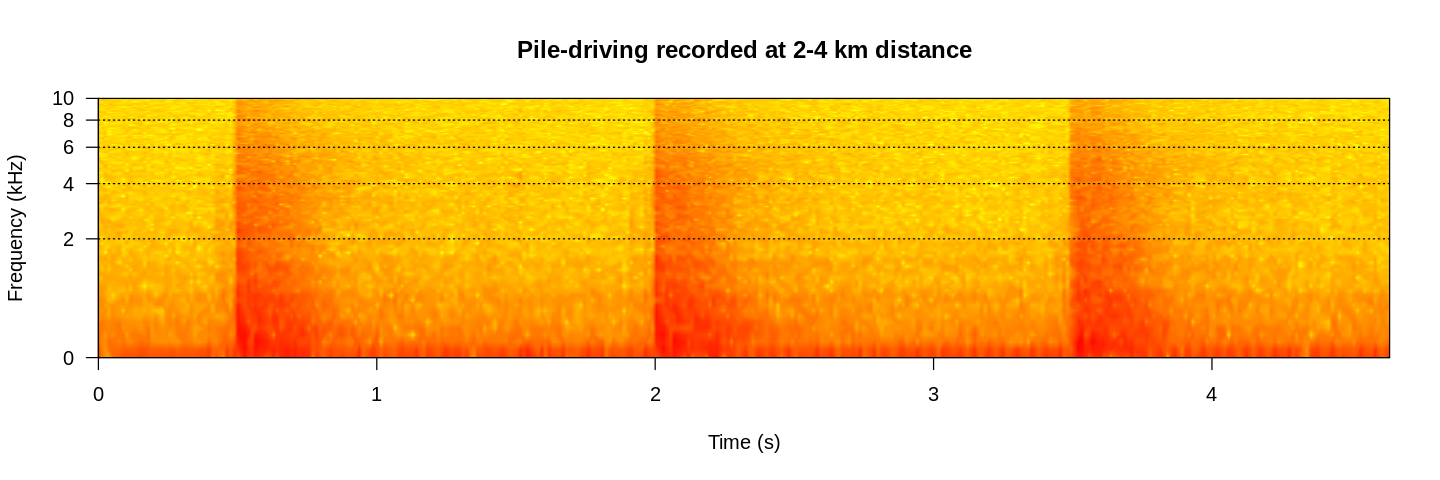

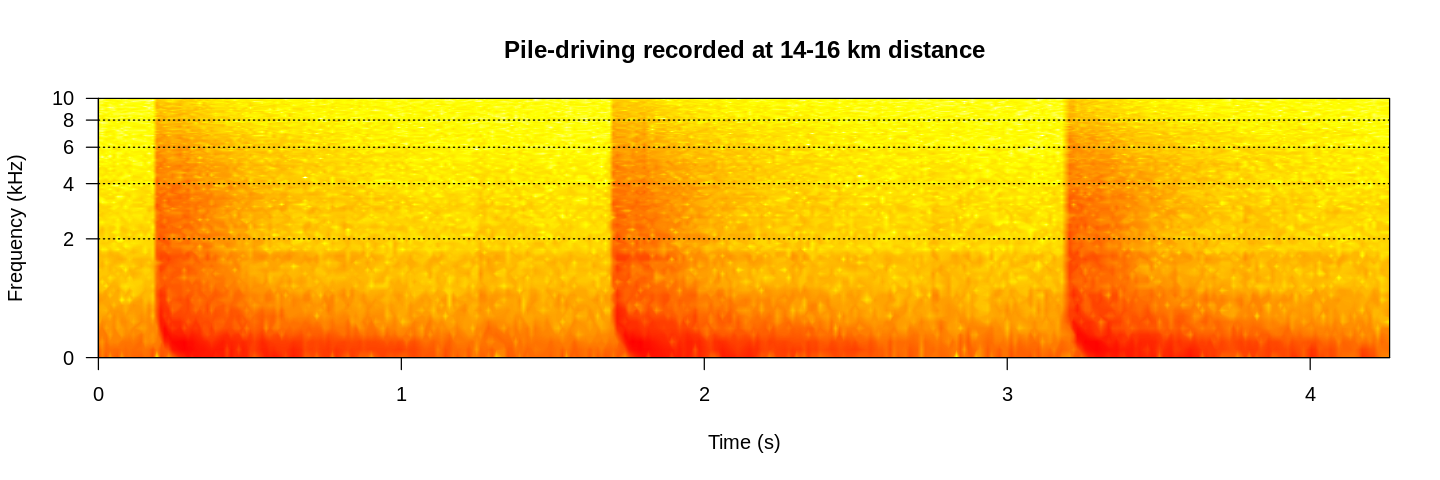

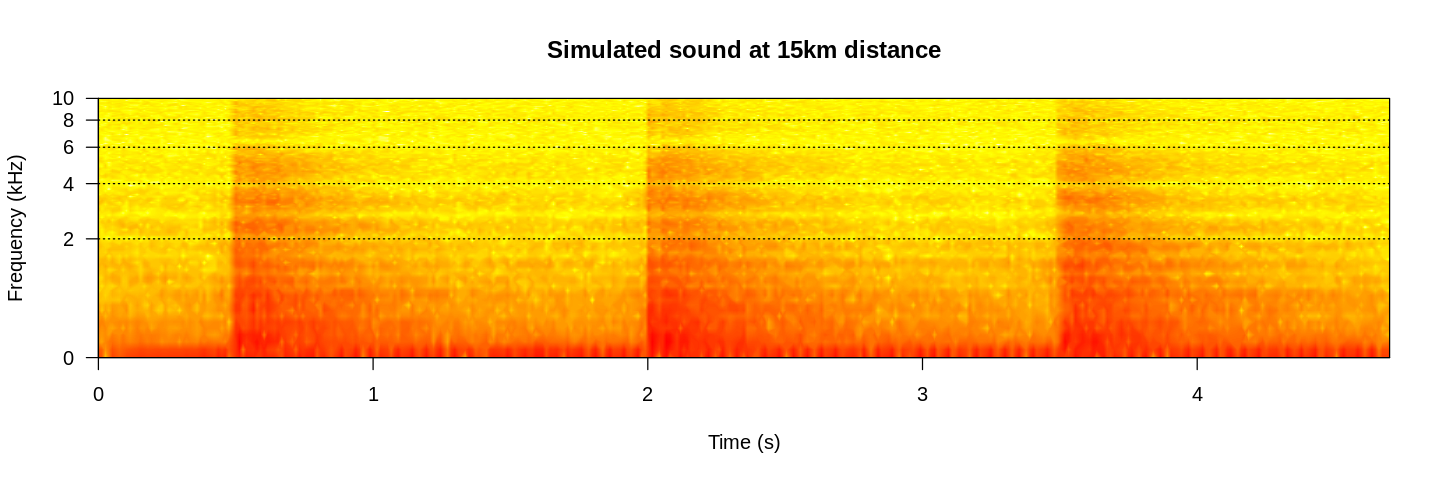

In [6]:
s1 <- readWave("audio/PileDriving_2-4km_keinBlasenschleierMedien1.wav")
spectro(s1, 
        palette=reverse.heat.colors,,collevel=seq(-128,0,1),
        flim=c(0,10),flog=TRUE,scale=FALSE,fastdisp=TRUE, main="Pile-driving recorded at 2-4 km distance")

s1 <- readWave("audio/PileDriving_14-16km_keinBlasenschleierMedien1.wav")
spectro(s1, 
        palette=reverse.heat.colors,,collevel=seq(-128,0,1),
        flim=c(0,10),flog=TRUE,scale=FALSE,fastdisp=TRUE, main="Pile-driving recorded at 14-16 km distance")

s1 <- readWave("audio/PileDriving_15km_simulated.wav")
spectro(s1, 
        palette=reverse.heat.colors,,collevel=seq(-128,0,1),
        flim=c(0,10),flog=TRUE,scale=FALSE,fastdisp=TRUE, main="Simulated sound at 15km distance")


## References

Erbe, C., Reichmuth, C., Cunningham, K., Lucke, K. and Dooling, R., 2016. Communication masking in marine mammals: A review and research strategy. Marine pollution bulletin, 103(1-2), pp.15-38.
